In [1]:
%cd ../../..

/home/schilcherj/master/deepClustering/LMU_Master_Practical_SoSe24


/home/schilcherj/master/deepClustering/deepClustEnv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
from clustpy.data.real_torchvision_data import load_cifar10, load_mnist
from clustpy.deep.autoencoders.convolutional_autoencoder import ConvolutionalAutoencoder
from clustpy.deep.autoencoders.feedforward_autoencoder import FeedforwardAutoencoder
import numpy as np
from practical.DeepClustering.DipECT.dipect import DipECT
import random
import matplotlib.pyplot as plt
import torch
import umap
from sklearn.decomposition import PCA

/home/schilcherj/master/deepClustering/deepClustEnv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-07 17:52:00,016	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-07 17:52:00,412	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [4]:
def visualize_peformance_AE(
    autoencoder,
    samples,
    labels,
    image_size: tuple,
    number_samples: int,
    seed: int = None,
):
    if seed is not None and type(seed) == int:
        random.seed(seed)

    # embedd the  given samples
    with torch.no_grad():
        embeddings = []
        reconstructions = []

        for batch in torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(torch.tensor(samples, dtype=torch.float32)),
            batch_size=256, shuffle=False
        ):  
            embedd = autoencoder.encode(batch[0])
            rec = autoencoder.decode(embedd)
            embeddings.append(embedd.cpu().numpy())
            reconstructions.append(rec.cpu().numpy())

        embeddings = np.concatenate(embeddings)
        reconstructions = np.concatenate(reconstructions)

    # visualize the embedded space

    print("fitting umap")
    plt.figure()
    projected_data = umap.UMAP().fit_transform(embeddings)
    plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels, cmap="viridis")
    plt.xlabel("umap feature 1")
    plt.ylabel("umap feature 2")
    plt.title("umap of embedded space")
    plt.colorbar(label="Digit")
    plt.show()
    print("fitted umap")

    # plot some reconstructions
    indices = random.sample(range(samples.shape[0]), number_samples)

    fig, ax = plt.subplots(2, number_samples, figsize=(10, 10))
    fig.tight_layout()
    ax = ax.flatten()
    for i, index in enumerate(indices):
        ax[i].imshow(samples[index].transpose(1,2,0)) 
        ax[i + number_samples].imshow(reconstructions[index].transpose(1,2,0)) 
        ax[i].set_title(f"original")
        ax[i + number_samples].set_title(f"reconstructed")
        ax[i].set_axis_off()
        ax[i + number_samples].set_axis_off()


In [5]:
dataset, labels = load_cifar10(return_X_y=True)
print(dataset.shape)
dataset = dataset.reshape(-1,32,32,3).transpose(0,3,1,2)
print(dataset.shape)

dataset = dataset / np.max(dataset)
autoencoder = ConvolutionalAutoencoder(32, [512, 10])
autoencoder.load_state_dict(torch.load("practical/DeepClustering/DipECT/conv_cifar_100_21.pth", map_location=torch.device('cpu')))
autoencoder.fitted = True

Files already downloaded and verified
Files already downloaded and verified
(60000, 3072)
(60000, 3, 32, 32)


fitting umap


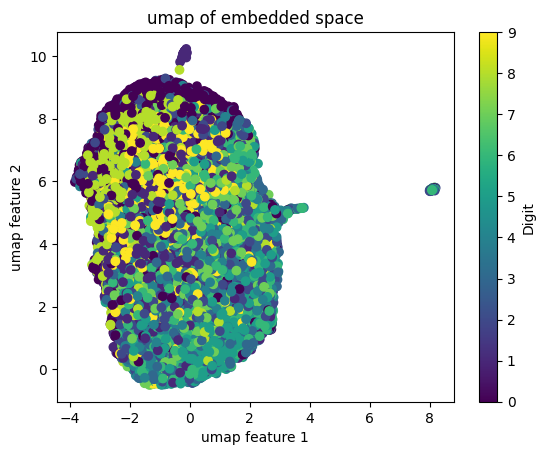

fitted umap


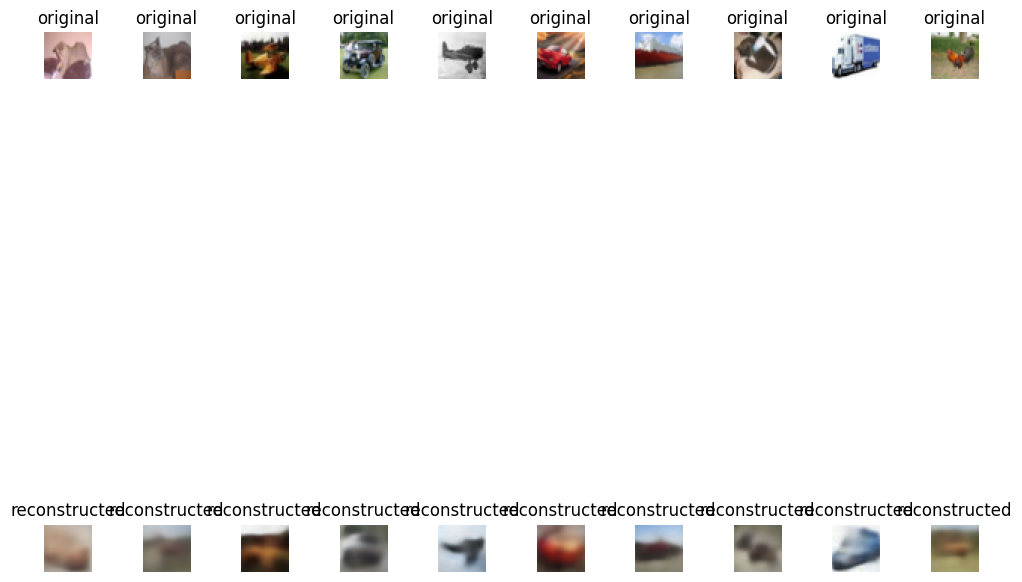

In [6]:
visualize_peformance_AE(autoencoder, dataset[:30000], labels[:30000], 32, 10, seed = 1)

In [80]:
autoencoder = ConvolutionalAutoencoder(32, [512, 10])
autoencoder.load_state_dict(torch.load("practical/DeepClustering/DipECT/conv_cifar_400_21.pth", map_location=torch.device('cpu')))
autoencoder.fitted = True

fitting umap


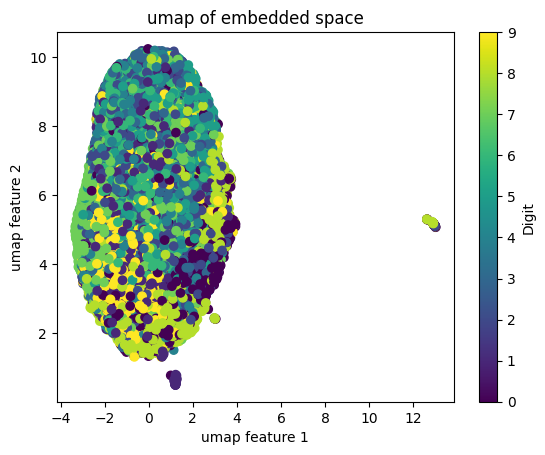

fitted umap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


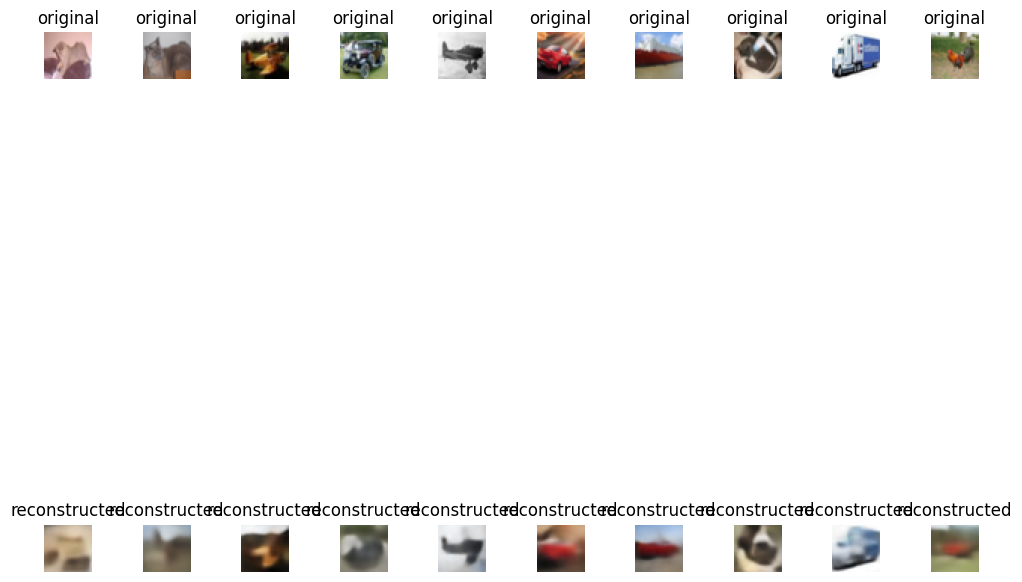

In [81]:
visualize_peformance_AE(autoencoder, dataset[:30000], labels[:30000], 32, 10, seed = 1)

In [7]:
autoencoder = ConvolutionalAutoencoder(32, [512, 10])
autoencoder.load_state_dict(torch.load("practical/DeepClustering/DipECT/conv_cifar_1000_21.pth", map_location=torch.device('cpu')))
autoencoder.fitted = True

[autoreload of practical.DeepClustering.DipECT.dipect failed: Traceback (most recent call last):
  File "/home/schilcherj/master/deepClustering/deepClustEnv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/schilcherj/master/deepClustering/deepClustEnv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/schilcherj/master/deepClustering/LMU_Master_Practical_SoSe24/practical/DeepClustering/DipECT/dipect.py", line 18, in <module>
    from clustpy.deep._train_utils import get_trained_autoencoder
ImportError: 

fitting umap


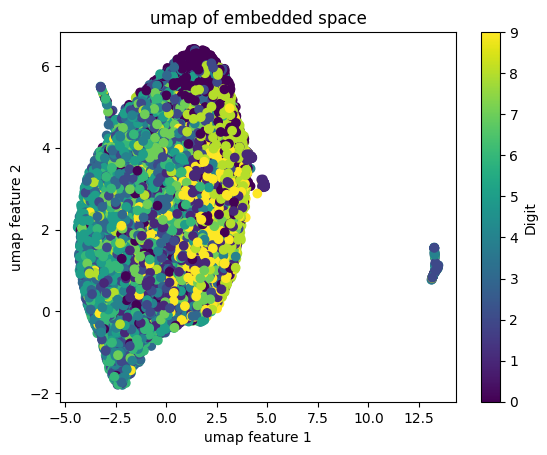

fitted umap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


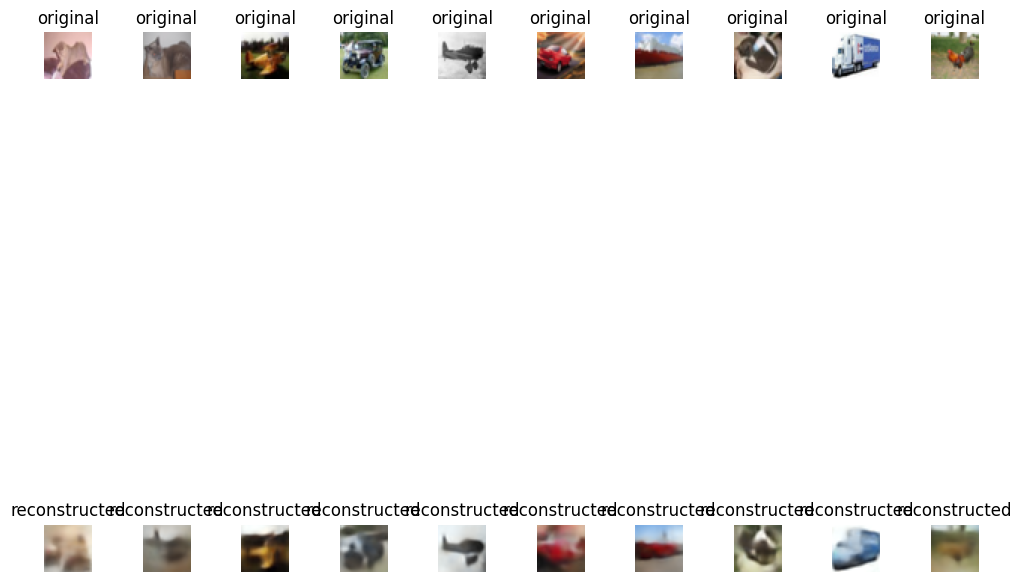

In [10]:
visualize_peformance_AE(autoencoder, dataset[:30000], labels[:30000], 32, 10, seed = 1)
